# データの読み込み

In [1]:
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skorch
import pandas as pd
import sklearn
import csv
import os

In [2]:
DATA_FOLDER = '/home/tamaru/scene_categorize/main/data/'
csv_path = os.path.join(DATA_FOLDER, 'resized_data.csv')
datalist = pd.read_csv(csv_path, names=["img_path", "l_class", 's_class'])
datalist.head()

img_path              l_class  \
0  /home/tamaru/scene_categorize/main/data/insta_...  5gokan-denkisogokan   
1  /home/tamaru/scene_categorize/main/data/insta_...  5gokan-denkisogokan   
2  /home/tamaru/scene_categorize/main/data/insta_...  5gokan-denkisogokan   
3  /home/tamaru/scene_categorize/main/data/insta_...  5gokan-denkisogokan   
4  /home/tamaru/scene_categorize/main/data/insta_...  5gokan-denkisogokan   

               s_class  
0  5gokan-denkisogokan  
1  5gokan-denkisogokan  
2  5gokan-denkisogokan  
3  5gokan-denkisogokan  
4  5gokan-denkisogokan

#insta_frames->insta_cubemap datalist
c_np = np.array(datalist)
col_name = datalist.columns.values
for row in c_np:
    row[0] = row[0].replace('insta_frames','insta_cubemap')
c_df = pd.DataFrame(c_np, columns=col_name)
c_df.to_csv('../data/cubemap_data.csv', index=False)

In [3]:
dfs = datalist.drop(['l_class'], axis=1)
dfs.groupby('s_class').count()

img_path
s_class                        
4gokan_inside                42
4gokan_outside_east          18
4gokan_outside_west         248
4gokan_stairs               750
5gokan-denkisogokan         361
5gokan-mediacenter          127
5gokan_1F                    65
5gokan_2F                    96
5gokan_3F                    32
5gokan_ent_east             135
5gokan_lounge               361
5gokan_out_east              99
5gokan_parking              251
5gokan_smoking               65
5gokan_stairs_east          948
5gokan_stairs_west          866
8gokan_1F                   208
8gokan_ent_north             26
8gokan_ent_south             32
8gokan_stairs_cnt           839
8gokan_stairs_east          775
denkisogokan_2F             120
denkisogokan_3F              33
denkisogokan_4F              31
denkisogokan_elevator        30
denkisogokan_lounge         198
denkisogokan_stairs         111
lab_bs_cnt                   35
lab_corner                   58
lab_desk                    813
lab_ent                      30
lab_printer                  31
lab_table                   755
lab_wb_cnt                   31
lab_wb_ent                   63
lounge                      247

In [4]:
dfs = dfs[dfs.s_class.str.startswith("lab")]
dfs

img_path    s_class
3138  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3139  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3140  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3141  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3142  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3143  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3144  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3145  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3146  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3147  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3148  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3149  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3150  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3151  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3152  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3153  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3154  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3155  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3156  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3157  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3158  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3159  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3160  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3161  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3162  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3163  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3164  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3165  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3166  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
3167  /home/tamaru/scene_categorize/main/data/insta_...    lab_ent
...                                                 ...        ...
4924  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4925  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4926  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4927  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4928  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4929  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4930  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4931  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4932  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4933  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4934  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4935  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4936  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4937  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4938  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4939  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4940  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4941  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4942  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4943  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4944  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4945  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4946  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4947  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4948  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4949  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4950  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4951  /home/tamaru/scene_categorize/main/data/insta_...  lab_table
4952  /home/tamaru/scene_ca

In [5]:
dfs.img_path.count()

1816

In [6]:
heatmap_df = pd.read_csv("/home/tamaru/scene_categorize/main/data/inpainting_data.csv", names=["img_path", "l_class", 's_class'])
heatmap_df = heatmap_df.drop(['l_class'], axis=1)
heatmap_df = heatmap_df[heatmap_df.s_class.str.startswith("lab")]
heatmap_df

img_path      s_class
12  /home/tamaru/scene_categorize/main/data/inpain...      lab_ent
13  /home/tamaru/scene_categorize/main/data/inpain...   lab_wb_ent
14  /home/tamaru/scene_categorize/main/data/inpain...   lab_bs_cnt
15  /home/tamaru/scene_categorize/main/data/inpain...     lab_desk
16  /home/tamaru/scene_categorize/main/data/inpain...     lab_desk
17  /home/tamaru/scene_categorize/main/data/inpain...   lab_corner
18  /home/tamaru/scene_categorize/main/data/inpain...  lab_printer
19  /home/tamaru/scene_categorize/main/data/inpain...   lab_wb_cnt
20  /home/tamaru/scene_categorize/main/data/inpain...    lab_table
21  /home/tamaru/scene_categorize/main/data/inpain...    lab_table

labs = dfs[dfs['s_class'].str.startswith('lab')]
num_labs_class = 10
labs.s_class.unique()


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder() 
le.fit(dfs.s_class) 
dfs["labels"] = le.transform(dfs.s_class) 
dfs.groupby('labels')

In [9]:
cor_table = dfs.groupby('labels').s_class.unique() 
cor_table = pd.DataFrame(cor_table) 
num_s_class = len(cor_table)
cor_table

s_class
labels               
0        [lab_bs_cnt]
1        [lab_corner]
2          [lab_desk]
3           [lab_ent]
4       [lab_printer]
5         [lab_table]
6        [lab_wb_cnt]
7        [lab_wb_ent]

In [10]:
heatmap_df['labels'] = le.transform(heatmap_df.s_class)
heatmap_table = heatmap_df.groupby('labels').s_class.unique()
heatmap_df= heatmap_df.drop(['s_class'], axis=1)
heatmap_table

labels
0     [lab_bs_cnt]
1     [lab_corner]
2       [lab_desk]
3        [lab_ent]
4    [lab_printer]
5      [lab_table]
6     [lab_wb_cnt]
7     [lab_wb_ent]
Name: s_class, dtype: object

In [11]:
dfs = dfs.drop(['s_class'], axis=1)
dfs

img_path  labels
3138  /home/tamaru/scene_categorize/main/data/insta_...       3
3139  /home/tamaru/scene_categorize/main/data/insta_...       3
3140  /home/tamaru/scene_categorize/main/data/insta_...       3
3141  /home/tamaru/scene_categorize/main/data/insta_...       3
3142  /home/tamaru/scene_categorize/main/data/insta_...       3
3143  /home/tamaru/scene_categorize/main/data/insta_...       3
3144  /home/tamaru/scene_categorize/main/data/insta_...       3
3145  /home/tamaru/scene_categorize/main/data/insta_...       3
3146  /home/tamaru/scene_categorize/main/data/insta_...       3
3147  /home/tamaru/scene_categorize/main/data/insta_...       3
3148  /home/tamaru/scene_categorize/main/data/insta_...       3
3149  /home/tamaru/scene_categorize/main/data/insta_...       3
3150  /home/tamaru/scene_categorize/main/data/insta_...       3
3151  /home/tamaru/scene_categorize/main/data/insta_...       3
3152  /home/tamaru/scene_categorize/main/data/insta_...       3
3153  /home/tamaru/scene_categorize/main/data/insta_...       3
3154  /home/tamaru/scene_categorize/main/data/insta_...       3
3155  /home/tamaru/scene_categorize/main/data/insta_...       3
3156  /home/tamaru/scene_categorize/main/data/insta_...       3
3157  /home/tamaru/scene_categorize/main/data/insta_...       3
3158  /home/tamaru/scene_categorize/main/data/insta_...       3
3159  /home/tamaru/scene_categorize/main/data/insta_...       3
3160  /home/tamaru/scene_categorize/main/data/insta_...       3
3161  /home/tamaru/scene_categorize/main/data/insta_...       3
3162  /home/tamaru/scene_categorize/main/data/insta_...       3
3163  /home/tamaru/scene_categorize/main/data/insta_...       3
3164  /home/tamaru/scene_categorize/main/data/insta_...       3
3165  /home/tamaru/scene_categorize/main/data/insta_...       3
3166  /home/tamaru/scene_categorize/main/data/insta_...       3
3167  /home/tamaru/scene_categorize/main/data/insta_...       3
...                                                 ...     ...
4924  /home/tamaru/scene_categorize/main/data/insta_...       5
4925  /home/tamaru/scene_categorize/main/data/insta_...       5
4926  /home/tamaru/scene_categorize/main/data/insta_...       5
4927  /home/tamaru/scene_categorize/main/data/insta_...       5
4928  /home/tamaru/scene_categorize/main/data/insta_...       5
4929  /home/tamaru/scene_categorize/main/data/insta_...       5
4930  /home/tamaru/scene_categorize/main/data/insta_...       5
4931  /home/tamaru/scene_categorize/main/data/insta_...       5
4932  /home/tamaru/scene_categorize/main/data/insta_...       5
4933  /home/tamaru/scene_categorize/main/data/insta_...       5
4934  /home/tamaru/scene_categorize/main/data/insta_...       5
4935  /home/tamaru/scene_categorize/main/data/insta_...       5
4936  /home/tamaru/scene_categorize/main/data/insta_...       5
4937  /home/tamaru/scene_categorize/main/data/insta_...       5
4938  /home/tamaru/scene_categorize/main/data/insta_...       5
4939  /home/tamaru/scene_categorize/main/data/insta_...       5
4940  /home/tamaru/scene_categorize/main/data/insta_...       5
4941  /home/tamaru/scene_categorize/main/data/insta_...       5
4942  /home/tamaru/scene_categorize/main/data/insta_...       5
4943  /home/tamaru/scene_categorize/main/data/insta_...       5
4944  /home/tamaru/scene_categorize/main/data/insta_...       5
4945  /home/tamaru/scene_categorize/main/data/insta_...       5
4946  /home/tamaru/scene_categorize/main/data/insta_...       5
4947  /home/tamaru/scene_categorize/main/data/insta_...       5
4948  /home/tamaru/scene_categorize/main/data/insta_...       5
4949  /home/tamaru/scene_categorize/main/data/insta_...       5
4950  /home/tamaru/scene_categorize/main/data/insta_...       5
4951  /home/tamaru/scene_categorize/main/data/insta_...       5
4952  /home/tamaru/scene_categorize/main/data/insta_...       5
4953  /home/tamaru/scene_categorize/main/data/insta_...       5

[1816 rows x 2 columns]

# trainデータ, testデータの分割

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data, test_data = train_test_split(dfs, test_size=0.2, random_state=42, stratify=dfs.labels)

In [14]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data.labels)

In [15]:
#画像の前処理を定義
data_transforms = {
    'data': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
}
#正規化をしない処理
to_tensor_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

In [16]:
class CustomDataset(torch.utils.data.Dataset):
        
    def __init__(self, dataframe, root_dir, transform=None):
        #前処理クラスの指定
        self.transform = transform
        #pandasでcsvデータの読み出し
        #画像とラベルの一覧を保持するリスト
        self.images = np.array(dataframe.img_path).tolist()
        self.labels = np.array(dataframe.labels).tolist()
        self.root_dir = root_dir
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        #dataframeから画像へのパスとラベルを読み出す
        label = self.labels[idx]
        img = self.images[idx]
        #画像の読み込み
        with open(img, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
        #画像への処理
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [17]:
train_set = CustomDataset(dataframe=train_data, root_dir="../data/insta_frames", transform=data_transforms['data'])
val_set = CustomDataset(dataframe=val_data, root_dir="../data/insta_frames", transform=data_transforms['data'])
test_set = CustomDataset(dataframe=test_data, root_dir="../data/insta_frames", transform=data_transforms['data'])

In [18]:
# DataLoaderのcollate_fnはバッチ内のtensorのshapeをすべて同じにする必要がある
# 自分で指定してエラーが起きないようにする
def my_collate_fn(batch):
    # datasetの出力が
    # [image, target] = dataset[batch_idx]
    # の場合.
    images = []
    labels = []
    for image, label in batch:
        images.append(image)
        labels.append(label)
    images = torch.stack(images,dim=0)
    return images, labels

In [19]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=16, shuffle=True, num_workers=6)
val_loader = torch.utils.data.DataLoader(dataset=val_set, batch_size=16, shuffle=False, num_workers=6)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=16, shuffle=False, num_workers=6)

In [20]:
heatmap_set = CustomDataset(dataframe=heatmap_df, root_dir="../data/inpainting_data", transform=data_transforms['data'])
heatmap_loader = torch.utils.data.DataLoader(dataset=heatmap_set, batch_size=1, shuffle=False, num_workers=6)

# ネットワークの定義
vgg16 finetuning

In [21]:
import torchvision.models as models
import bagnets.pytorchnet

In [22]:
num_classes = num_s_class
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = bagnets.pytorchnet.bagnet17(pretrained=True)

In [23]:
#パラメータ凍結と採取層クラス数変更
for param in net.parameters():
    param.requires_grad = False
#最終層をnum_s_classクラス用に変更
num_ftrs = net.fc.in_features
net.fc = nn.Linear(in_features=num_ftrs, out_features=num_classes).to(device)
#最適化関数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.fc.parameters())
net = net.to(device)
net

BagNet(
  (conv1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256,

#学習率の変更
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=)

# 学習の実行

In [24]:
#Cross Validationを行いたい...
#Early Stopping を行いたい

num_epochs = 10
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        #view()での変換をしない
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1]==labels).sum().item()
        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss/len(train_loader.dataset)
    avg_train_acc = train_acc/len(train_loader.dataset)
    
    #val
    net.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            #view()での変換をしない
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1]==labels).sum().item()
   
    avg_val_loss = val_loss/len(val_loader.dataset)
    avg_val_acc = val_acc/len(val_loader.dataset)
    
    print('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'.format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

Epoch [1/10], Loss: 0.0664, val_loss: 0.0564, val_acc: 0.8213
Epoch [2/10], Loss: 0.0390, val_loss: 0.0442, val_acc: 0.7973
Epoch [3/10], Loss: 0.0271, val_loss: 0.0385, val_acc: 0.8557
Epoch [4/10], Loss: 0.0219, val_loss: 0.0309, val_acc: 0.9450
Epoch [5/10], Loss: 0.0170, val_loss: 0.0271, val_acc: 0.8694
Epoch [6/10], Loss: 0.0136, val_loss: 0.0185, val_acc: 0.9381
Epoch [7/10], Loss: 0.0112, val_loss: 0.0172, val_acc: 0.9759
Epoch [8/10], Loss: 0.0082, val_loss: 0.0146, val_acc: 0.9794
Epoch [9/10], Loss: 0.0076, val_loss: 0.0150, val_acc: 0.9759
Epoch [10/10], Loss: 0.0069, val_loss: 0.0098, val_acc: 1.0000


# train, validationのloss acc のグラフを作成

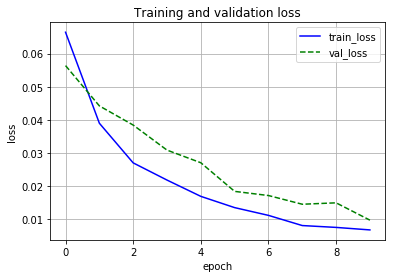

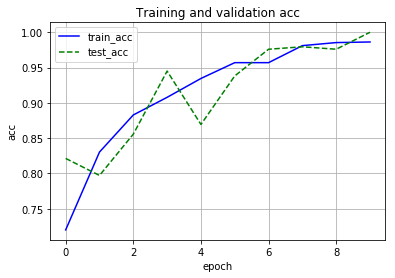

In [25]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='test_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation acc')
plt.grid()

# Confusion Matrix

In [26]:
net = net.eval()

In [27]:
pred = []
Y = []
for i, (x,y) in enumerate(test_loader):
    with torch.no_grad():
        x = x.to(device)
        y = y.to(device)
        output = net(x)
    pred += [int(l.argmax()) for l in output]
    Y += [int(l) for l in y]

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

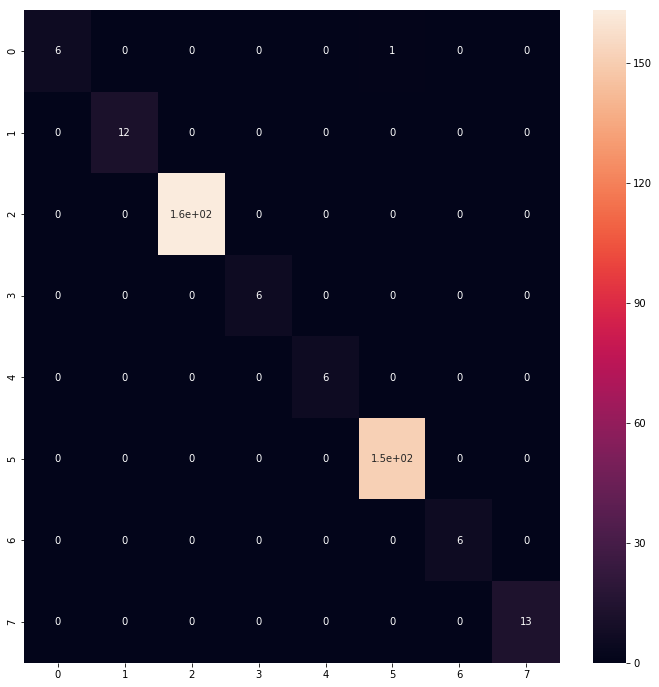

accuracy: 0.9972527472527473


In [29]:
cmx = confusion_matrix(Y, pred)
plt.figure(figsize=(12,12))
sns.heatmap(cmx, annot=True)
plt.show()
print('accuracy: {}'.format(accuracy_score(Y, pred)))

In [30]:
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       0.99      1.00      1.00       151
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00       364
   macro avg       1.00      0.98      0.99       364
weighted avg       1.00      1.00      1.00       364



In [31]:
print(cor_table)

              s_class
labels               
0        [lab_bs_cnt]
1        [lab_corner]
2          [lab_desk]
3           [lab_ent]
4       [lab_printer]
5         [lab_table]
6        [lab_wb_cnt]
7        [lab_wb_ent]


# Heatmap

In [32]:
from bagnets.utils import plot_heatmap, generate_heatmap_pytorch

In [33]:
pred = []
Y = []
for i, (x,y) in enumerate(heatmap_loader):
    with torch.no_grad():
        x = x.to(device)
        y = y.to(device)
        output = net(x)
    pred += [int(l.argmax()) for l in output]
    Y += [int(y)]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

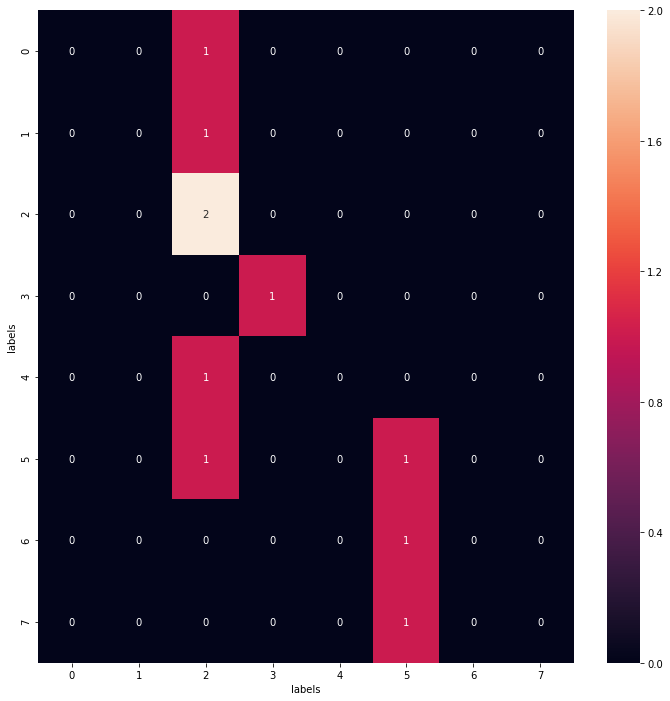

accuracy: 0.4


In [35]:
cmx = confusion_matrix(Y, pred, labels=cor_table.index)
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame(cmx, columns=cor_table.index, index=cor_table.index), annot=True)
plt.show()
print('accuracy: {}'.format(accuracy_score(Y, pred)))

In [36]:
pd.set_option("display.max_columns",50)
pd.DataFrame({'Y':Y, 'pred':pred}).T

0  1  2  3  4  5  6  7  8  9
Y     3  7  0  2  2  1  4  6  5  5
pred  3  5  2  2  2  2  2  5  2  5

In [37]:
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         2
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

   micro avg       0.40      0.40      0.40        10
   macro avg       0.21      0.31      0.24        10
weighted avg       0.23      0.40      0.28        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
cor_table

s_class
labels               
0        [lab_bs_cnt]
1        [lab_corner]
2          [lab_desk]
3           [lab_ent]
4       [lab_printer]
5         [lab_table]
6        [lab_wb_cnt]
7        [lab_wb_ent]

In [39]:
net.eval()

BagNet(
  (conv1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256,

In [40]:
def show_heatmap(net, heatmap_dataframe):
    nps = np.array(heatmap_dataframe)
    for row in nps:
        with open(row[0], 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
            image = transforms.Compose([
                transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])(image)
            image = torch.unsqueeze(image,0)
            original, label = image, [row[1]]
            # torch.Tensor->np.arrayに変換
            # generate_heatmap_pytorchにはnp.arrayの入力が必要
            original = original.numpy()

        heatmap = generate_heatmap_pytorch(net, original, label, 33)

        fig = plt.figure(figsize=(8,4))
        original_image = original[0].transpose([1,2,0])
        ax = plt.subplot(121)
        ax.set_title('original')
        plt.imshow(original_image)
        plt.axis('off')

        ax = plt.subplot(122)
        ax.set_title('heatmap')
        plot_heatmap(heatmap, original_image, ax, dilation=0.5, percentile=99, alpha=.25)
        plt.axis('off')
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


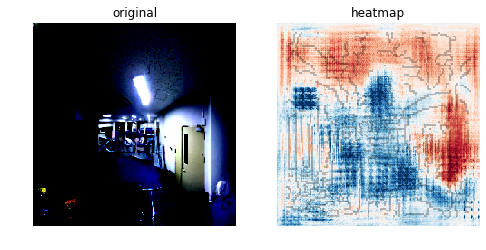

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


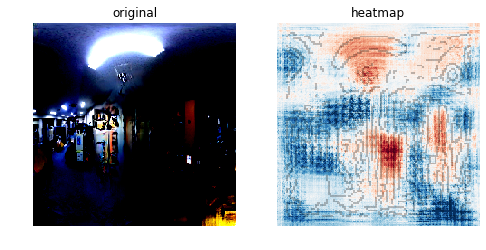

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


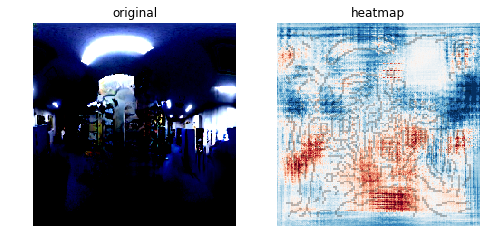

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


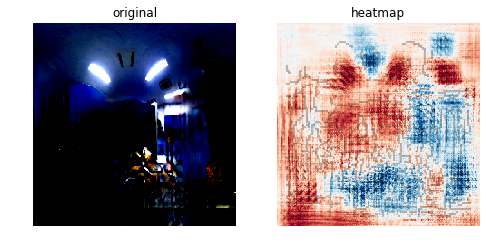

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


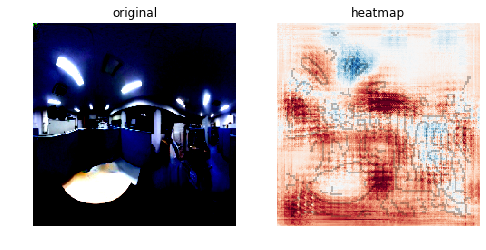

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


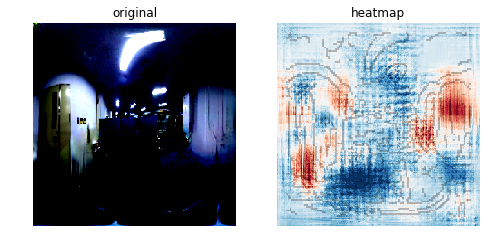

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


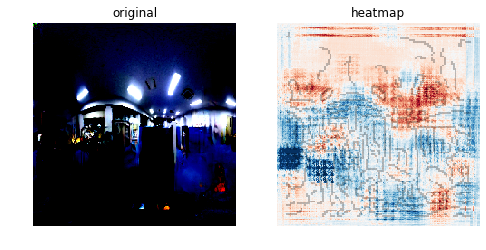

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


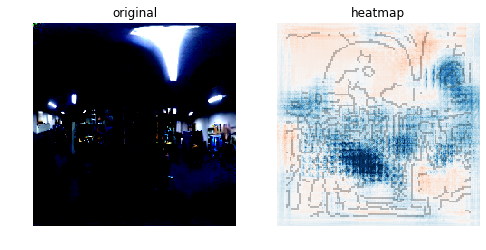

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


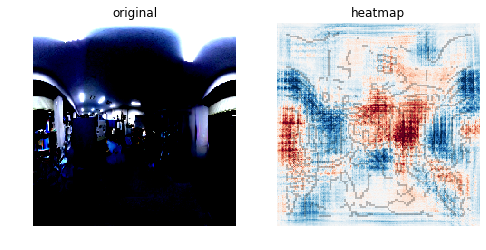

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


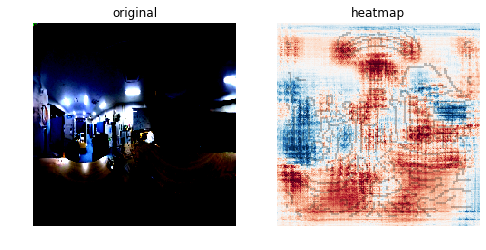

In [41]:
show_heatmap(net, heatmap_df)

In [42]:
heatmap_df

img_path  labels
12  /home/tamaru/scene_categorize/main/data/inpain...       3
13  /home/tamaru/scene_categorize/main/data/inpain...       7
14  /home/tamaru/scene_categorize/main/data/inpain...       0
15  /home/tamaru/scene_categorize/main/data/inpain...       2
16  /home/tamaru/scene_categorize/main/data/inpain...       2
17  /home/tamaru/scene_categorize/main/data/inpain...       1
18  /home/tamaru/scene_categorize/main/data/inpain...       4
19  /home/tamaru/scene_categorize/main/data/inpain...       6
20  /home/tamaru/scene_categorize/main/data/inpain...       5
21  /home/tamaru/scene_categorize/main/data/inpain...       5

In [43]:
torch.save(net.state_dict(),'/home/tamaru/scene_categorize/main/data/bagnet-pytorch.pth')

# 重みのロード方法
net = TheModelClass(*args, **kwargs)
net.load_state_dict(torch.load(PATH))